In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

## Function definition

Two function are presented: one to plot the initial state of the rocket grain and then other for each iteration of the burning process.

In [2]:
def initialState(r, theta, state, filename = None, route = None, savefigure = False):
    '''Plotting of the initial state of the grain distribution 
    
    INPUTS:
       r: 1D array with the coordinates of the radial position
       theta: 1D array with the coordinates of the tangential position
       state: state matrix with the initial state of the grain
       route: folder directory of the location
       
    OPTIONAL INPUTS:
        filename (default=None): name of the output file with the initial state    
        savefigure (default=False): flag to save the iteration figure
       
    OUTPUTS:
       just a plot with the figure'''
    
    # using squared matrix, the dimension will be NxN, so get it from R
    N = len(r)
    
    # create the meshgrid with the 1D arrays
    R, TH = np.meshgrid(r,theta)
    
    # given that the array is created without 2*np.pi, let's complete the 
    # circle to create the contour by setting the same values in the state
    # for 0 and for 2*np.pi (correcting also the other arrays)
    FTH = np.vstack((TH, np.ones(N)*2*np.pi))
    FR = np.vstack((R, np.ones(N)*R[0,:]))
    Fst = np.reshape(np.append(state,state[0,:]),(N+1,N))

    # plot the initial state with a binary colormap
    fig = plt.figure(1, figsize = (15,15), dpi = 50)
    ax = plt.subplot(111, projection = 'polar')
    CS = ax.pcolormesh(FTH, FR, Fst, cmap = plt.cm.get_cmap('binary'))
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(False)
    
    # save the figure if it explicitilly said
    if savefigure:
        plt.savefig( route + filename + '.png', bbox_inches='tight')

In [3]:
def burningState(r, theta, state, iteration = None, filename = None, savefigure = False):
    '''Plotting of a state (t) of the grain distribution whereas burning

    INPUTS:
       r: 1D array with the coordinates of the radial position
       theta: 1D array with the coordinates of the tangential position
       state: state matrix with the current state of the grain

    OPTIONAL INPUTS:
        iteration (default=None): iteration for saving the figure
        filename (default=None): name of the output file with the initial state    
        savefigure (default=False): flag to save the iteration figure

    OUTPUTS:
       just a plot with the figure'''
    
    # using squared matrix, the dimension will be NxN, so get it from R
    N = len(r)
    
    # create the meshgrid with the 1D arrays
    R, TH = np.meshgrid(r,theta)
    
    # given that the array is created without 2*np.pi, let's complete the 
    # circle to create the contour by setting the same values in the state
    # for 0 and for 2*np.pi (correcting also the other arrays)
    FTH = np.vstack((TH, np.ones(N)*2*np.pi))
    FR = np.vstack((R, np.ones(N)*R[0,:]))
    Fst = np.reshape(np.append(state,state[0,:]),(N+1,N))

    # plot the state with a custom colormap
    fig = plt.figure(1, figsize = (15,15), dpi = 50)
    ax = plt.subplot(111, projection = 'polar')
    ax.contourf(FTH, FR, Fst, 2, cmap = grainStates, norm = norm)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(False)
    
    # save the figure if it explicitilly said
    if savefigure:
        plt.savefig('state%s%i.png' %(filename, iteration), bbox_inches='tight')

## Colormap definition
To get good-looking representations of the rocket grain combustion, a custom colormap will be used for the burning process. This colormap has been created by using https://stackoverflow.com/questions/32769706/how-to-define-colormap-with-absolute-values-with-matplotlib. For the initial state, where only empty or propellant exist, a binary colormap will be used. 

In [4]:
levels = [0, 0.5, 1.5, 2.5]
colors = ['white', 'red', [0.4,0.4,0.4]]
grainStates, norm = matplotlib.colors.from_levels_and_colors(levels, colors)

## Function testing

In [5]:
# parameters for the cellular automata
N = 250
r_max = 1

# linspace for the radial direction
r = np.linspace(0,1,N)

# tangential direction (avoiding computation of the 0 = 2*np.pi)
theta = np.linspace(0,2*np.pi*(N-1)/N,N)

# create the meshgrid with the 1D arrays
R, TH = np.meshgrid(r,theta)

# create the state matrix for the case, filling up everything with propellant
st = 2*np.ones((N,N))

# clear out the middle of the propellant (radius of 0.2)
st[R < 0.2] = 0

In [6]:
# save the initialization for the CA coding
np.savetxt('./examples/tubular',st/2,fmt='%i')

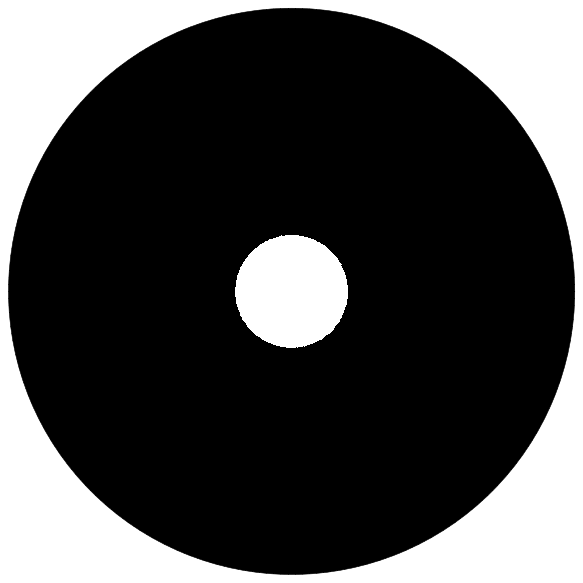

In [7]:
# show up the initial location of the grain
initialState(r,theta,st)

In [8]:
# ignite the limit between empty and propellant
st[:,np.where(np.abs(st[1,0:-2] - st[1,1:-1]) == 2)[0][0]+1] = 1

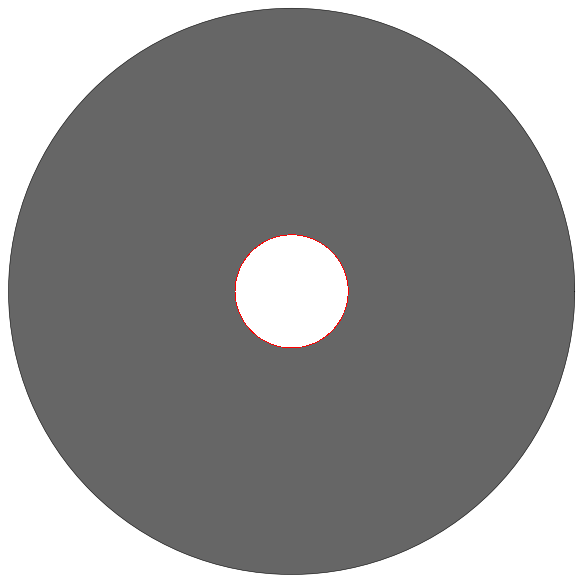

In [9]:
# show the ignition state
burningState(r, theta, st)